<h2>Plane Detection in Satellite Imagery</h2>

Detect aircrafts in Planet satellite image chips.

<h3>Context</h3>

The aim of this dataset is to help address the difficult task of detecting the location of airplanes in satellite images. Automating this process can be applied to many issues including monitoring airports for activity and traffic patterns, and defense intelligence.
Continusouly updates will be made to this dataset as new Planet imagery released. Current images were collected as late as July 2017.

Dataset is available from here: https://www.kaggle.com/datasets/rhammell/planesnet?resource=download

<h3>Content</h3>

Provided is a zipped directory planesnet.zip that contains the entire dataset as .png image chips. Each individual image filename follows a specific format: {label} __ {scene id} __ {longitude} _ {latitude}.png

<ul>
<li> <b>label</b>: Valued 1 or 0, representing the "plane" class and "no-plane" class, respectively</li>
<li> <b>scene id</b>: The unique identifier of the PlanetScope visual scene the image chip was extracted from. The scene id can be used with the Planet API to discover and download the entire scene</li>
<li> <b>longitude_latitude</b>: The longitude and latitude coordinates of the image center point, with values separated by a single underscore.</li>
</ul>
The pixel value data for each 20x20 RGB image is stored as a list of 1200 integers within the data list. The first 400 entries contain the red channel values, the next 400 the green, and the final 400 the blue. The image is stored in row-major order, so that the first 20 entries of the array are the red channel values of the first row of the image.

<h4>Class labels</h4>

The "plane" class includes 8 000 images. Images in this class are near-centered on the body of a single airplane, with the majority of the plane's wings, tail, and nose also visible. Examples of different aircraft sizes, orientations, and atmospheric collection conditions are included. Example images from this class are shown below.

<div>
<img src="img/planes.png" width="600", align = "left"/>
</div>

The "no-plane" class includes 24 000 images. A third of these are a random sampling of different landcover features - water, vegetion, bare earth, buildings, etc. - that do not include any portion of an airplane. The next third are "partial planes" that contain a portion of an airplane, but not enough to meet the full definition of the "plane" class. The last third are "confusers" - chips with bright objects or strong linear features that resemble a plane - that have previously been mislabeled by machine learning models. Example images from this class are shown below.

<div>
<img src="img/no_plane1.png" width="600", align = "left"/>
<img src="img/no_plane2.png" width="600", align = "left"/>
<img src="img/no_plane3.png" width="600", align = "left"/>
</div>

Inspired by: https://medium.com/@kylepob61392/airplane-image-classification-using-a-keras-cnn-22be506fdb53

<h3>Data Preprocessing</h3>

In [30]:
# Imports
import glob
import numpy as np
import os.path as path
import imageio.v2 as io

In [31]:
import os
os.getcwd()
%cd data/planesnet

[Errno 2] No such file or directory: 'data/planesnet'
/Users/roman_permyakov/python_projects/Plane_detection/data/planesnet


In [32]:
# IMAGE_PATH should be the path to the downloaded planesnet folder
IMAGE_PATH = '/Users/roman_permyakov/python_projects/Plane_detection/data/planesnet'
file_paths = glob.glob(path.join(IMAGE_PATH, '*.png'))

In [33]:
# Load the images
images = [io.imread(path) for path in file_paths]
images = np.asarray(images)

In [34]:
# Get image size
image_size = np.asarray([images.shape[1], images.shape[2], images.shape[3]])
print(image_size)

[20 20  3]


In [35]:
# Get number of images
n_images = images.shape[0]
n_images

32000

In [36]:
# Scale
images = images / 255

In [37]:
# Show the first 2 images
os.listdir('/Users/roman_permyakov/python_projects/Plane_detection/data/planesnet')[:2]

['1__20170620_175442_0e30__-118.40972173523741_33.94610057751408.png',
 '0__20160830_220147_1_0c82__-118.404769319_33.9416321899.png']

In [38]:
# Show the first 2 images with full paths
file_paths[:2]

['/Users/roman_permyakov/python_projects/Plane_detection/data/planesnet/1__20170620_175442_0e30__-118.40972173523741_33.94610057751408.png',
 '/Users/roman_permyakov/python_projects/Plane_detection/data/planesnet/0__20160830_220147_1_0c82__-118.404769319_33.9416321899.png']

In [39]:
# Show the first image and its first symbol
filename = path.basename(file_paths[0])
print("The first image is:", filename)

filename = path.basename(file_paths[0])[0]
print("The first symbol of the first image is:", filename)

The first image is: 1__20170620_175442_0e30__-118.40972173523741_33.94610057751408.png
The first symbol of the first image is: 1


In [40]:
# Read the labels from the filenames
labels = np.zeros(n_images)
for i in range(n_images):
    filename = path.basename(file_paths[i])[0]
    labels[i] = int(filename[0])

In [41]:
# Split into test and training sets
TRAIN_TEST_SPLIT = 0.9

# Split at the given index
split_index = int(TRAIN_TEST_SPLIT * n_images)

# Random sequence of the indices
shuffled_indices = np.random.permutation(n_images)

train_indices = shuffled_indices[0:split_index]
test_indices = shuffled_indices[split_index:]

# Split the images and the labels
x_train = images[train_indices, :, :, :]
y_train = labels[train_indices]
x_test = images[test_indices, :, :, :]
y_test = labels[test_indices]

print ("The Split Index is:", split_index)
print ("The Shuffled Indices are:", shuffled_indices)
print ("The Trained Indices are:", train_indices)
print ("The Test Indices are:", test_indices)

print ("Trained Labels are:", y_train)
print ("Test labels are:", y_test)

The Split Index is: 28800
The Shuffled Indices are: [20225  9457 15170 ... 10995 24736  2832]
The Trained Indices are: [20225  9457 15170 ... 24272 14646 24020]
The Test Indices are: [22861   493 15011 ... 10995 24736  2832]
Trained Labels are: [0. 1. 0. ... 1. 0. 0.]
Test labels are: [0. 1. 1. ... 0. 0. 0.]


<h3>Data Visualization</h3>

In [42]:
import matplotlib.pyplot as plt

In [43]:
def visualize_data(positive_images, negative_images):
    # INPUTS
    # positive_images - Images where the label = 1 (True)
    # negative_images - Images where the label = 0 (False)

    figure = plt.figure(figsize=(15, 8))
    count = 0
    for i in range(positive_images.shape[0]):
        count += 1
        figure.add_subplot(2, positive_images.shape[0], count)
        plt.imshow(positive_images[i, :, :])
        plt.axis('off')
        plt.title("Aircrafts")

        figure.add_subplot(1, negative_images.shape[0], count)
        plt.imshow(negative_images[i, :, :])
        plt.axis('off')
        plt.title("Other")
    plt.show()

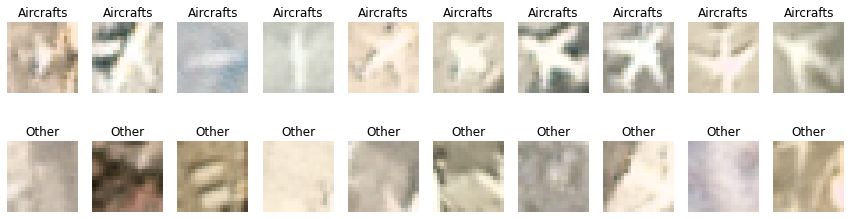

In [44]:
# Number of positive and negative examples to show
N_TO_VISUALIZE = 10

# Select the first N positive examples
positive_example_indices = (y_train == 1)
positive_examples = x_train[positive_example_indices, :, :]
positive_examples = positive_examples[0:N_TO_VISUALIZE, :, :]

# Select the first N negative examples
negative_example_indices = (y_train == 0)
negative_examples = x_train[negative_example_indices, :, :]
negative_examples = negative_examples[0:N_TO_VISUALIZE, :, :]

# Call the visualization function
visualize_data(positive_examples, negative_examples)

<h3>Model Creation</h3>

In [45]:
# Imports
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping, TensorBoard
from sklearn.metrics import accuracy_score, f1_score
from datetime import datetime

In [46]:
# Hyperparamater
N_LAYERS = 4

In [47]:
def cnn(size, n_layers):
    # INPUTS
    # size     - size of the input images
    # n_layers - number of layers
    # OUTPUTS
    # model    - compiled CNN

    # Define hyperparamters
    MIN_NEURONS = 20
    MAX_NEURONS = 120
    KERNEL = (3, 3)

    # Determine the # of neurons in each convolutional layer
    steps = np.floor(MAX_NEURONS / (n_layers + 1))
    nuerons = np.arange(MIN_NEURONS, MAX_NEURONS, steps)
    nuerons = nuerons.astype(np.int32)

    # Define a model
    model = Sequential()

    # Add convolutional layers
    for i in range(0, n_layers):
        if i == 0:
            shape = (size[0], size[1], size[2])
            model.add(Conv2D(nuerons[i], KERNEL, input_shape=shape))
        else:
            model.add(Conv2D(nuerons[i], KERNEL))

        model.add(Activation('relu'))

    # Add max pooling layer
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(MAX_NEURONS))
    model.add(Activation('relu'))

    # Add output layer
    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    # Compile the model
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    # Print a summary of the model
    model.summary()

    return model

In [48]:
# Instantiate the model
model = cnn(size=image_size, n_layers=N_LAYERS)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 18, 18, 20)        560       
                                                                 
 activation_6 (Activation)   (None, 18, 18, 20)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 44)        7964      
                                                                 
 activation_7 (Activation)   (None, 16, 16, 44)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 68)        26996     
                                                                 
 activation_8 (Activation)   (None, 14, 14, 68)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 12, 12, 92)       

<h3>Model Training</h3>

In [20]:
# Training hyperparamters
EPOCHS = 150
BATCH_SIZE = 200

In [21]:
# Early stopping callback
PATIENCE = 10
early_stopping = EarlyStopping(monitor='loss', min_delta=0, patience=PATIENCE, verbose=1, mode='auto')

In [22]:
# TensorBoard callback
LOG_DIRECTORY_ROOT = '/Users/roman_permyakov/python_projects/Plane_detection/logs'
now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
log_dir = "{}/run-{}/".format(LOG_DIRECTORY_ROOT, now)
tensorboard = TensorBoard(log_dir=log_dir, write_graph=True, write_images=True)

In [23]:
# Place the callbacks in a list
callbacks = [early_stopping, tensorboard]

In [24]:
# Train the model
history = model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=callbacks, verbose=1)

Epoch 1/150
144/144 [==============================] - 41s 277ms/step - loss: 0.3676 - accuracy: 0.8292
Epoch 2/150
144/144 [==============================] - 42s 290ms/step - loss: 0.1878 - accuracy: 0.9224
Epoch 3/150
144/144 [==============================] - 41s 283ms/step - loss: 0.1296 - accuracy: 0.9495
Epoch 4/150
144/144 [==============================] - 41s 284ms/step - loss: 0.1190 - accuracy: 0.9542
Epoch 5/150
144/144 [==============================] - 47s 327ms/step - loss: 0.0963 - accuracy: 0.9627
Epoch 6/150
144/144 [==============================] - 49s 343ms/step - loss: 0.0843 - accuracy: 0.9692
Epoch 7/150
144/144 [==============================] - 51s 357ms/step - loss: 0.0747 - accuracy: 0.9723
Epoch 8/150
144/144 [==============================] - 61s 425ms/step - loss: 0.0686 - accuracy: 0.9758
Epoch 9/150
144/144 [==============================] - 59s 408ms/step - loss: 0.0578 - accuracy: 0.9795
Epoch 10/150
144/144 [==============================] - 59s 411m

<h3>Model Evaluation</h3>

In [ ]:
# Save model
model.save("/Users/roman_permyakov/python_projects/Plane_detection/BTPCNN_Save.h5")
model.save_weights("/Users/roman_permyakov/python_projects/Plane_detection/BTPCNN_Saveweight.h5")

In [49]:
# Load model back
from keras.models import load_model
model=load_model('/Users/roman_permyakov/python_projects/Plane_detection/BTPCNN_Save.h5')

In [50]:
# Make a prediction on the test set
test_predictions = model.predict(x_test)
test_predictions = np.round(test_predictions)

In [51]:
# Report the accuracy
accuracy = accuracy_score(y_test, test_predictions)
print("Accuracy: " + str(accuracy))

Accuracy: 0.9978125


In [23]:
print(history.history.keys())

NameError: name 'history' is not defined

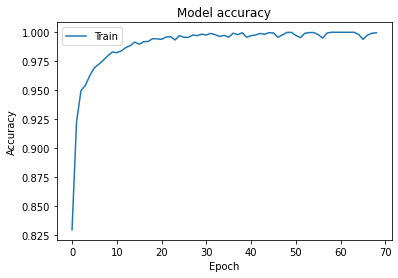

In [31]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

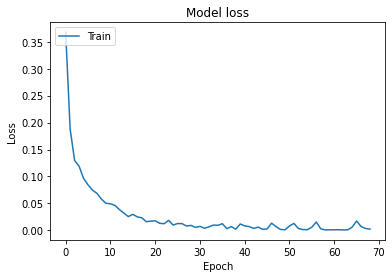

In [32]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [53]:
# Visulize all the labels 
def visualize_all_labels(x_data, y_real, y_predicted):
    x_data = x_test
    y_real = y_test
    y_predicted = np.asarray(test_predictions).ravel()
x_data = x_test
y_real = y_test
y_predicted = np.asarray(test_predictions).ravel()
print("Number of test images are:", x_data.shape[0])
print("Square-root of the array is:", np.sqrt(x_data.shape[0]))
print("A max value of the array square-root is:", np.ceil(np.sqrt(x_data.shape[0])))
print("A max integer value of the array square-root is:", int(np.ceil(np.sqrt(x_data.shape[0]))))
print ("The real labels are:", y_real)
print ("The predicted labels are:", y_predicted)

Number of test images are: 3200
Square-root of the array is: 56.568542494923804
A max value of the array square-root is: 57.0
A max integer value of the array square-root is: 57
The real labels are: [0. 1. 1. ... 0. 0. 0.]
The predicted labels are: [0. 1. 1. ... 0. 0. 0.]


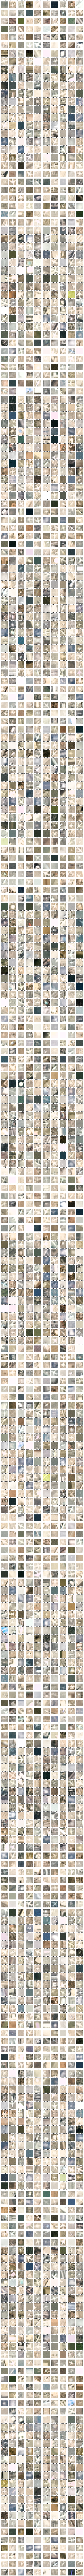

TypeError: visualize_all_labels() missing 3 required positional arguments: 'x_data', 'y_real', and 'y_predicted'

In [54]:
    columns = 10
    lines = (x_data.shape[0])/columns
    count = 0
    figure = plt.figure(figsize=(columns*2, lines*2))
    for i in range(x_data.shape[0]):
        count += 1
        figure.add_subplot(
            int(lines),
            int(columns),
            count)
        plt.imshow(x_data[i, :, :, :])
        plt.axis('off')
        plt.title("Predicted: " + str(int(y_predicted[i])) + ", Real: " + str(int(y_real[i])), fontsize=10)

    plt.show()

visualize_all_labels()

In [55]:
# Visulize incorrect labels 
def visualize_incorrect_labels(x_data, y_real, y_predicted):
    # INPUTS
    # x_data      - images
    # y_real      - ground truth labels
    # y_predicted - predicted label
    #count = 0
    #figure = plt.figure()
    x_data = x_test
    y_real = y_test
    y_predicted = np.asarray(test_predictions).ravel()
    
incorrect_label_indices = (y_real != y_predicted)
x_data = x_data[incorrect_label_indices, :, :, :]
y_real = y_real[incorrect_label_indices]
y_predicted = y_predicted[incorrect_label_indices]

print("Number of test images with incorrect labels are:", x_data.shape[0])
print("Square-root of the array is:", np.sqrt(x_data.shape[0]))
print("A max value of the array square-root is:", np.ceil(np.sqrt(x_data.shape[0])))
print("A max integer value of the array square-root is:", int(np.ceil(np.sqrt(x_data.shape[0]))))
print("The real incorrect labels are:", y_real)
print("The predicted incorrect labels are:", y_predicted)

Number of test images with incorrect labels are: 7
Square-root of the array is: 2.6457513110645907
A max value of the array square-root is: 3.0
A max integer value of the array square-root is: 3
The real incorrect labels are: [0. 1. 0. 1. 0. 0. 1.]
The predicted incorrect labels are: [1. 0. 1. 0. 1. 1. 0.]


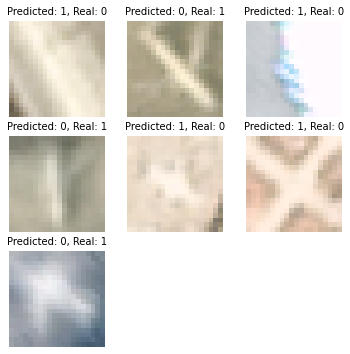

In [56]:
    columns = int(np.ceil(np.sqrt(x_data.shape[0])))
    lines = int(np.ceil(np.sqrt(x_data.shape[0])))
    count = 0
    figure = plt.figure(figsize=(columns*2, lines*2))
    for i in range(x_data.shape[0]):
        count += 1
        figure.add_subplot(
            int(lines),
            int(columns),
            count)
        plt.imshow(x_data[i, :, :, :])
        plt.axis('off')
        plt.title("Predicted: " + str(int(y_predicted[i])) + ", Real: " + str(int(y_real[i])), fontsize=10)

    plt.show()

visualize_incorrect_labels(x_test, y_test, np.asarray(test_predictions).ravel())